In [1]:
import pandas as pd
dados = pd.read_csv('dados_unidade_3.csv')
dados.columns = [x.lower() for x in dados.columns]
dados

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,co,nox
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


(array([4.0000e+00, 2.7900e+02, 5.4170e+03, 1.2157e+04, 1.0875e+04,
        5.2480e+03, 1.7350e+03, 5.0100e+02, 3.1300e+02, 2.0400e+02]),
 array([ 25.905 ,  35.3055,  44.706 ,  54.1065,  63.507 ,  72.9075,
         82.308 ,  91.7085, 101.109 , 110.5095, 119.91  ]),
 <BarContainer object of 10 artists>)

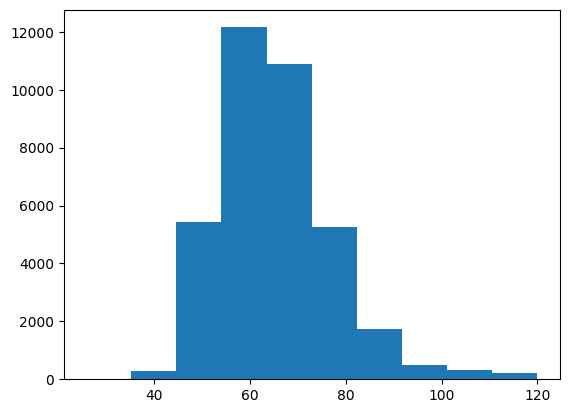

In [2]:
import matplotlib.pyplot as plt
plt.hist(dados.nox)

{'whiskers': [<matplotlib.lines.Line2D at 0x20faaaad6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20faaaadc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20faaaad400>],
 'medians': [<matplotlib.lines.Line2D at 0x20faa901190>],
 'fliers': [<matplotlib.lines.Line2D at 0x20faa901430>],
 'means': []}

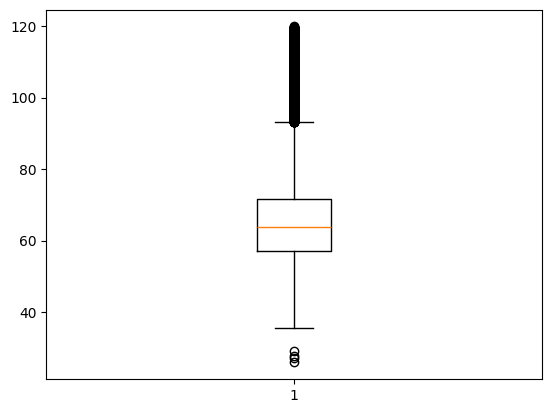

In [3]:
plt.boxplot(dados.nox)

# Análise de dados de regressão: exploração de algoritmos e métricas

## Pré-processamento

A base de dados pode ser utilizada para prever o nox ou o co. Vamos abordar de forma diferente: consideraremos o nox como targer e toas as demais colunas como features.

Assim, escalonaremos via min-max todas as features, mas não escalonaremos o target (escolha)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
escalonar = dados.iloc[:,:10]
escalonar = pd.DataFrame(scaler.fit_transform(escalonar),columns=escalonar.columns)
escalonar['nox'] = dados['nox'].values
escalonar

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,co,nox
0,0.249727,0.647291,0.782894,0.269481,0.272873,0.853147,0.980288,0.435959,0.385552,0.007397,81.952
1,0.242929,0.639409,0.790252,0.268594,0.271657,0.852148,0.985848,0.435959,0.384421,0.010146,82.377
2,0.233960,0.641379,0.798437,0.270749,0.273351,0.856144,0.989386,0.441369,0.412685,0.010227,83.776
3,0.230247,0.639409,0.806004,0.270387,0.269919,0.856144,0.988880,0.440488,0.402887,0.005231,82.505
4,0.230432,0.629557,0.802693,0.269898,0.270180,0.850150,0.984584,0.435959,0.387813,0.006056,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,0.227552,0.840394,0.908034,0.195303,0.060344,0.361638,0.772050,0.113991,0.105366,0.249251,89.172
36729,0.240026,0.842365,0.919017,0.200047,0.057260,0.367632,0.789487,0.110342,0.092742,0.252675,88.849
36730,0.270360,0.840394,0.934560,0.221864,0.050352,0.371628,0.819813,0.098012,0.114976,0.258797,96.147
36731,0.279629,0.844335,0.921172,0.343225,0.254801,0.760240,0.987364,0.394942,0.361622,0.075121,64.738


Separação em x e y e separação em dados de treino e teste

In [5]:
x = escalonar.iloc[:,:10].values
y = escalonar.iloc[:,10].values

In [6]:
x

array([[0.24972657, 0.64729064, 0.7828943 , ..., 0.43595873, 0.3855517 ,
        0.00739735],
       [0.24292881, 0.63940887, 0.79025159, ..., 0.43595873, 0.38442116,
        0.01014571],
       [0.23395973, 0.64137931, 0.79843658, ..., 0.4413689 , 0.41268465,
        0.01022734],
       ...,
       [0.27035982, 0.84039409, 0.93455955, ..., 0.09801208, 0.11497588,
        0.25879674],
       [0.27962887, 0.84433498, 0.92117191, ..., 0.39494212, 0.36162195,
        0.07512055],
       [0.28321696, 0.84630542, 0.9257308 , ..., 0.31945143, 0.30339916,
        0.27165312]])

In [7]:
y

array([ 81.952,  82.377,  83.776, ...,  96.147,  64.738, 109.24 ])

In [8]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=3)

Averiguando distribuição do target nos três grupos

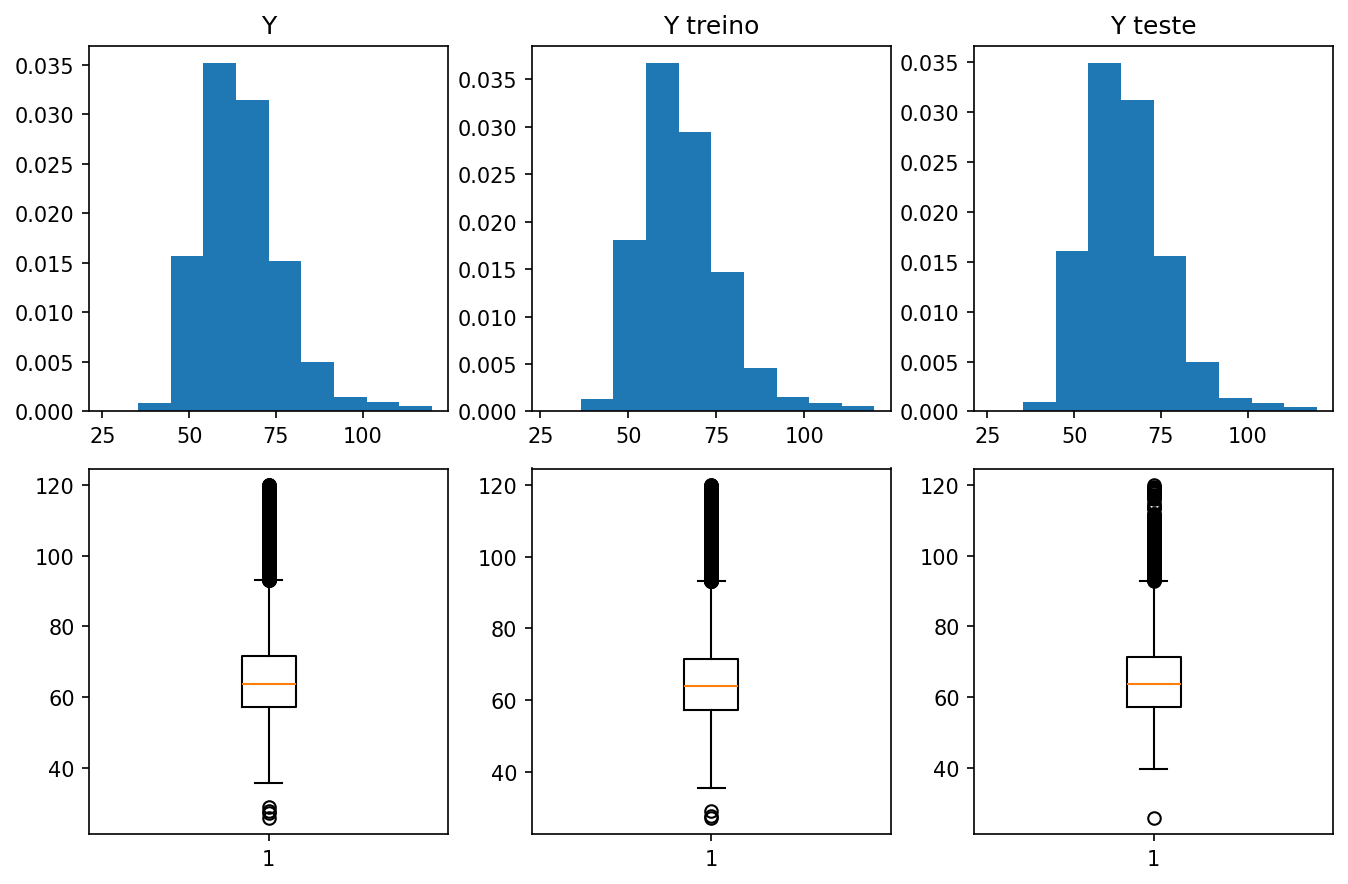

In [9]:
fig, ax = plt.subplots(2,3,figsize = (9,6),dpi=150)
ax[0,0].hist(dados.nox,density = True)
ax[0,0].set_title('Y')
ax[0,1].hist(y_treino,density = True)
ax[0,1].set_title('Y treino')
ax[0,2].hist(y_teste,density = True)
ax[0,2].set_title('Y teste')
ax[1,0].boxplot(dados.nox)
ax[1,1].boxplot(y_treino)
ax[1,2].boxplot(y_teste)
plt.tight_layout()


## Algoritmos de machine learning de regressão

### Regressão Linear

![Alt text](image.png)

In [55]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

In [56]:
y_teste[:10],y_prev[:10]

(array([67.773, 67.955, 84.848, 69.775, 78.81 , 61.878, 64.865, 68.187,
        59.308, 69.479]),
 array([73.2228282 , 68.18220914, 83.91840862, 68.31105703, 67.90431428,
        69.31109925, 60.24683969, 61.55069936, 59.33684068, 74.831925  ]))

In [57]:
y_teste[-10:],y_prev[-10:]

(array([64.396, 60.725, 55.498, 86.324, 64.005, 66.223, 63.481, 50.217,
        79.041, 63.95 ]),
 array([71.4653371 , 53.93572148, 55.3401584 , 80.55063393, 68.03516735,
        63.59093556, 69.30325031, 62.38881282, 71.72180871, 68.37696053]))

Repare já na comparação dos valores que não é mais possível pensar em acuracidade, precisão e sensibilidade devido à própria natureza do dado.

Um dos métodos mais simples de avaliar graficamente o desempenho do modelo é por meio do plot y_teste x y_previsto:

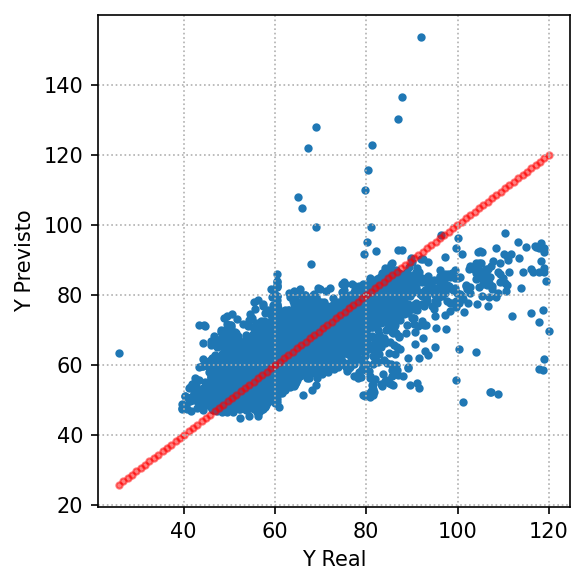

In [58]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

A reta em vermelho é a reta do modelo perfeito, onde todo valor real é previsto corretamente. Quanto mais perto desta reta estiverem os dados, mais preciso é o modelo

### Regressão polinomial

![Alt text](image-1.png)

![Alt text](image-2.png)

Para fazer a regressão polinomais, precisamos expandir as features (valores de x)

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_treino_2 = poly.fit_transform(x_treino)
x_teste_2 = poly.transform(x_teste)

In [60]:
modelo = LinearRegression()
modelo.fit(x_treino_2,y_treino)
y_prev = modelo.predict(x_teste_2)

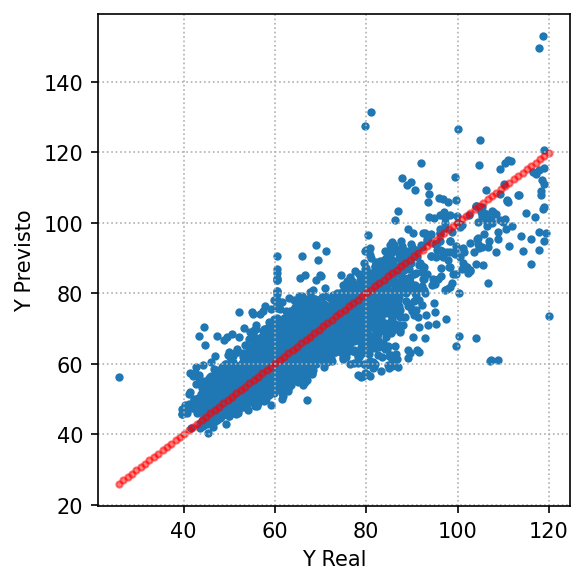

In [61]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

### Árvore de Decisão

![Alt text](image-3.png)

In [62]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

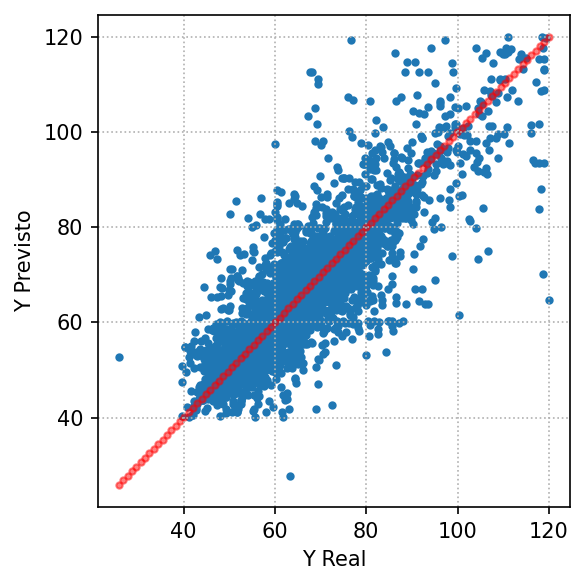

In [63]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

### RandomForest

![Alt text](image-5.png)

In [64]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

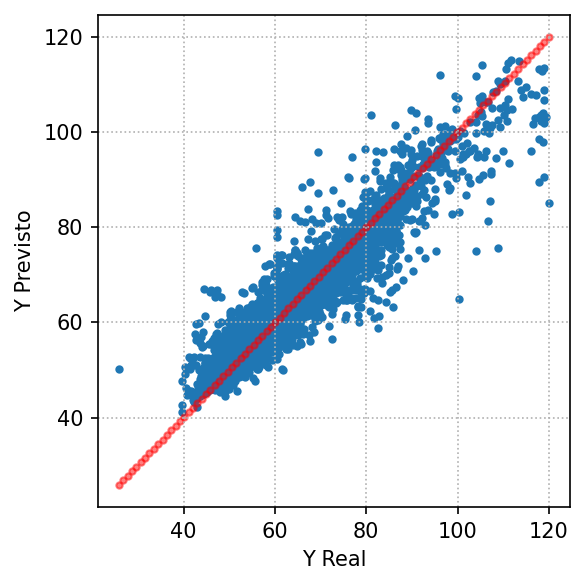

In [65]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

### KNN Regressor

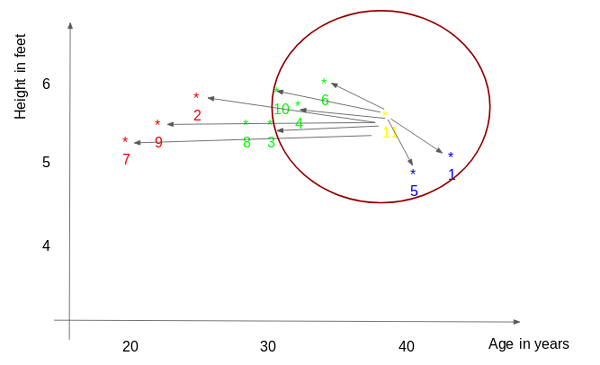


In [66]:
from sklearn.neighbors import KNeighborsRegressor
modelo = KNeighborsRegressor()
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

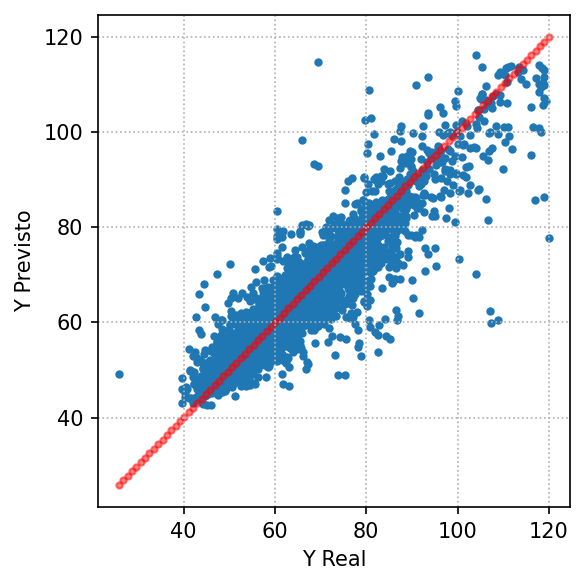

In [67]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

### Support Vector Machines

![Alt text](image-6.png)

In [21]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

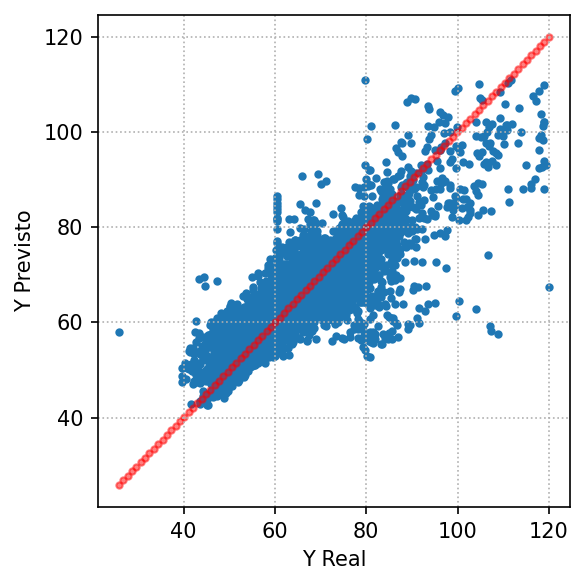

In [22]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

### Rede Neural

![Alt text](image-4.png)

In [29]:
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(100,100),max_iter = 200,verbose=3)
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

Iteration 1, loss = 932.31303395
Iteration 2, loss = 87.63141355
Iteration 3, loss = 65.42515731
Iteration 4, loss = 56.11686667
Iteration 5, loss = 49.37475391
Iteration 6, loss = 44.15126502
Iteration 7, loss = 40.19678312
Iteration 8, loss = 36.94752892
Iteration 9, loss = 34.34447830
Iteration 10, loss = 32.18536042
Iteration 11, loss = 30.43094594
Iteration 12, loss = 29.15535979
Iteration 13, loss = 28.16647060
Iteration 14, loss = 27.26381689
Iteration 15, loss = 26.56063641
Iteration 16, loss = 25.78901838
Iteration 17, loss = 25.26604103
Iteration 18, loss = 24.47007031
Iteration 19, loss = 23.73673702
Iteration 20, loss = 23.19354803
Iteration 21, loss = 22.77462286
Iteration 22, loss = 22.25738510
Iteration 23, loss = 21.91507443
Iteration 24, loss = 21.57583328
Iteration 25, loss = 21.15168848
Iteration 26, loss = 20.96631300
Iteration 27, loss = 20.55775409
Iteration 28, loss = 20.30990106
Iteration 29, loss = 20.12130964
Iteration 30, loss = 19.82361486
Iteration 31, loss

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


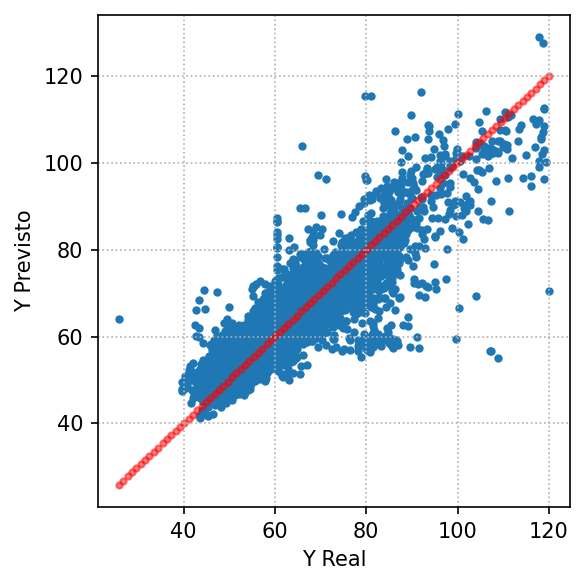

In [30]:
import numpy as np
fig,ax = plt.subplots(1,figsize = (4,4),dpi = 150)
ax.scatter(y_teste,y_prev,marker='.')
y_min = min(y_teste)
y_max = max(y_teste)
melhor_reta = np.linspace(y_min,y_max,100)
ax.scatter(melhor_reta,melhor_reta,marker = '.',c = 'red',alpha=0.5)
ax.grid(ls = ':')
ax.set_xlabel('Y Real')
ax.set_ylabel('Y Previsto')
plt.tight_layout()

## Métricas de avaliação de modelos de regressão: R2, MAE, MSE, RSME, MAPE

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [32]:
analise_resultado = pd.DataFrame()
analise_resultado['y_teste'] = y_teste
analise_resultado['y_previsto'] = y_prev

In [33]:
analise_resultado

,y_teste,y_previsto
0,67.773,73.140372
1,67.955,66.605274
2,84.848,83.699701
3,69.775,68.179238
4,78.810,72.024191
...,...,...
7342,66.223,64.469374
7343,63.481,66.058352
7344,50.217,61.215861
7345,79.041,71.485028


### R2 - Correlação de Pearson

O quanto um valor está correlacionado com outro. Na regressão, ele é usado para comparar o valor previsto pelo modelo com o valor real, mas pode ser utilizado para averiguar a correlação entre duas variáveis distintas.

No caso da regressão, quanto mais próximo de 1, melhor será o modelo

In [35]:
r2 = r2_score(y_teste,y_prev)
print(r2)

0.771858389670373


### Erro absoluto médio

In [38]:
analise_resultado['erro'] = analise_resultado.y_previsto-analise_resultado.y_teste
analise_resultado['erro_absoluto'] = abs(analise_resultado.y_previsto-analise_resultado.y_teste)
analise_resultado

,y_teste,y_previsto,erro,erro_absoluto
0,67.773,73.140372,5.367372,5.367372
1,67.955,66.605274,-1.349726,1.349726
2,84.848,83.699701,-1.148299,1.148299
3,69.775,68.179238,-1.595762,1.595762
4,78.810,72.024191,-6.785809,6.785809
...,...,...,...,...
7342,66.223,64.469374,-1.753626,1.753626
7343,63.481,66.058352,2.577352,2.577352
7344,50.217,61.215861,10.998861,10.998861
7345,79.041,71.485028,-7.555972,7.555972


In [39]:
erro_absoluto_medio = analise_resultado.erro_absoluto.mean()
erro_absoluto_medio

3.7392887045075622

In [40]:
mae = mean_absolute_error(y_teste,y_prev)
mae

3.7392887045075622

Obs.: a interpretação do MAE depende da escala dos valores de Y!

(array([1.000e+00, 6.600e+01, 1.114e+03, 2.413e+03, 2.153e+03, 1.075e+03,
        3.440e+02, 9.000e+01, 5.700e+01, 3.400e+01]),
 array([ 25.905 ,  35.3055,  44.706 ,  54.1065,  63.507 ,  72.9075,
         82.308 ,  91.7085, 101.109 , 110.5095, 119.91  ]),
 <BarContainer object of 10 artists>)

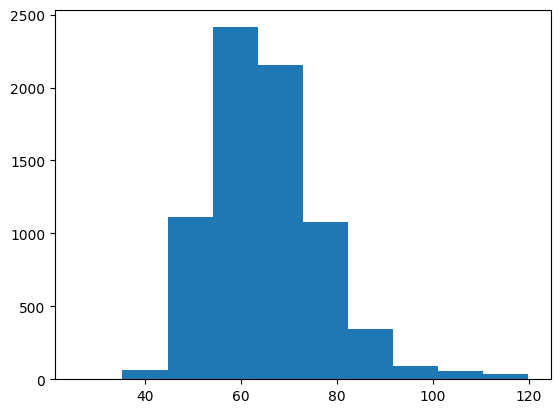

In [42]:
plt.hist(y_teste)

### Erro quadrático médio e Raiz do erro quadrático médio

In [43]:
analise_resultado['erro_quadratico'] = analise_resultado.erro**2
analise_resultado

,y_teste,y_previsto,erro,erro_absoluto,erro_quadratico
0,67.773,73.140372,5.367372,5.367372,28.808686
1,67.955,66.605274,-1.349726,1.349726,1.821760
2,84.848,83.699701,-1.148299,1.148299,1.318592
3,69.775,68.179238,-1.595762,1.595762,2.546455
4,78.810,72.024191,-6.785809,6.785809,46.047200
...,...,...,...,...,...
7342,66.223,64.469374,-1.753626,1.753626,3.075205
7343,63.481,66.058352,2.577352,2.577352,6.642743
7344,50.217,61.215861,10.998861,10.998861,120.974948
7345,79.041,71.485028,-7.555972,7.555972,57.092720


In [44]:
erro_quadratico_medio = analise_resultado.erro_quadratico.mean()
erro_quadratico_medio

30.536342961611478

In [45]:
mse = mean_squared_error(y_teste,y_prev)
mse

30.536342961611478

Obs.: Em geral, quanto menor essa métrica, melhor é o modelo. Mas não há muito como comparar esse valor com alguma das variáveis

In [46]:
import math as mt
raiz_erro_quadratico_medio = mt.sqrt(erro_quadratico_medio)
raiz_erro_quadratico_medio

5.525969866151233

Não há função no Sklearn que calcule essa métrica

Mas esse valor é também comparável com a escala do valor de Y

### Erro absoluto percentual médio

In [50]:
analise_resultado['pc_erro'] = analise_resultado.erro_absoluto/analise_resultado.y_teste
analise_resultado

,y_teste,y_previsto,erro,erro_absoluto,erro_quadratico,pc_erro
0,67.773,73.140372,5.367372,5.367372,28.808686,0.079196
1,67.955,66.605274,-1.349726,1.349726,1.821760,0.019862
2,84.848,83.699701,-1.148299,1.148299,1.318592,0.013534
3,69.775,68.179238,-1.595762,1.595762,2.546455,0.022870
4,78.810,72.024191,-6.785809,6.785809,46.047200,0.086103
...,...,...,...,...,...,...
7342,66.223,64.469374,-1.753626,1.753626,3.075205,0.026481
7343,63.481,66.058352,2.577352,2.577352,6.642743,0.040600
7344,50.217,61.215861,10.998861,10.998861,120.974948,0.219027
7345,79.041,71.485028,-7.555972,7.555972,57.092720,0.095596


In [51]:
erro_absoluto_percentual_medio = analise_resultado.pc_erro.mean()
erro_absoluto_percentual_medio

0.05775037710748877

In [52]:
mape = mean_absolute_percentage_error(y_teste,y_prev)
mape

0.05775037710748877

(array([6.827e+03, 4.620e+02, 4.500e+01, 1.200e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.08349891e-06, 1.47345219e-01, 2.94687354e-01, 4.42029489e-01,
        5.89371624e-01, 7.36713759e-01, 8.84055894e-01, 1.03139803e+00,
        1.17874016e+00, 1.32608230e+00, 1.47342443e+00]),
 <BarContainer object of 10 artists>)

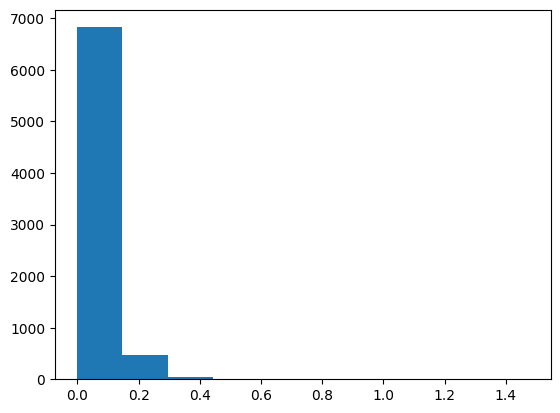

In [53]:
plt.hist(analise_resultado.pc_erro)

{'whiskers': [<matplotlib.lines.Line2D at 0x20fbb8d9040>,
 'caps': [<matplotlib.lines.Line2D at 0x20fbb8ede50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fbb8d9cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20fbb909280>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fbb909490>],
 'means': []}

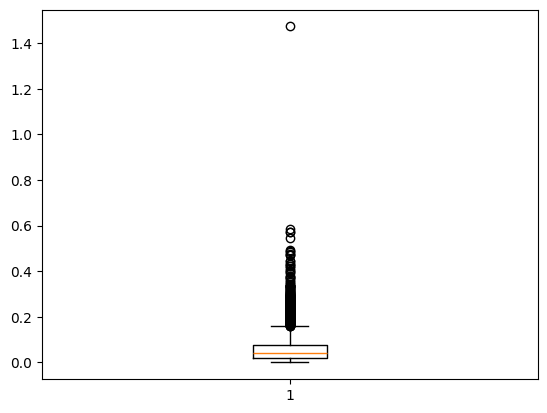

In [54]:
plt.boxplot(analise_resultado.pc_erro)

In [68]:
modelos = [
    LinearRegression(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    SVR(),
    MLPRegressor(),    
]
nomes = [
    'Regressão linear',
    'Regressão polinomial grau 2',
    'Decision tree',
    'Random Forest',
    'K-neighbors',
    'Support vector machine',
    'Rede neural'
]

In [69]:
resultados = pd.DataFrame()
resultados['modelo'] = nomes
resultados

,modelo
0,Regressão linear
1,Regressão polinomial grau 2
2,Decision tree
3,Random Forest
4,K-neighbors
5,Support vector machine
6,Rede neural


In [70]:
r2 = []
mae = []
mse = []
rmse = []
mape = []
for index, modelo in enumerate(modelos):
    print(f'treinando {nomes[index]}')
    if nomes[index] == 'Regressão polinomial grau 2':
        modelo.fit(x_treino_2,y_treino)
        y_pred = modelo.predict(x_teste_2)
    else:
        modelo.fit(x_treino,y_treino)
        y_pred = modelo.predict(x_teste)
    r2.append(r2_score(y_teste,y_pred))
    mae.append(mean_absolute_error(y_teste,y_pred))
    mse.append(mean_squared_error(y_teste,y_pred))
    rmse.append(mt.sqrt(mean_squared_error(y_teste,y_pred)))
    mape.append(mean_absolute_percentage_error(y_teste,y_pred))
resultados['r2'] = r2
resultados['mae'] = mae
resultados['mse'] = mse
resultados['rmse'] = rmse
resultados['mape'] = mape

treinando Regressão linear
treinando Regressão polinomial grau 2
treinando Decision tree
treinando Random Forest
treinando K-neighbors
treinando Support vector machine
treinando Rede neural


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
resultados

,modelo,r2,mae,mse,rmse,mape
0,Regressão linear,0.556051,5.346907,59.421753,7.708551,0.082608
1,Regressão polinomial grau 2,0.771530,3.829895,30.580284,5.529944,0.058736
2,Decision tree,0.758833,3.387442,32.279741,5.681526,0.052156
3,Random Forest,0.891010,2.401884,14.588097,3.819437,0.036950
4,K-neighbors,0.860847,2.604471,18.625358,4.315711,0.039467
5,Support vector machine,0.735060,3.969545,35.461777,5.954979,0.060598
6,Rede neural,0.758702,3.889255,32.297302,5.683071,0.060030
